# Cryptocurrency Clusters

## Data Preparation

In [1]:
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt


import pandas as pd
file = Path('./Resources/crypto_data.csv')

In [2]:
# Read `crypto_data.csv` into Pandas. The dataset was obtained 
#from [CryptoCompare](https://min-api.cryptocompare.com/data/all/coinlist).
df = pd.read_csv(file)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
#Discard all cryptocurrencies that are not being traded. In other 
#words, filter for currencies that are currently being traded.
df = df.loc[df.IsTrading == True]

#Once you have done this, drop the `IsTrading` column from the dataframe.
traded_df = df.drop('IsTrading', axis=1)
traded_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [4]:
#Remove all rows that have at least one null value.
traded_df.dropna(inplace=True)
traded_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
#Filter for cryptocurrencies that have been mined. That is, the total coins
#mined should be greater than zero.
traded_df = traded_df.loc[traded_df['TotalCoinsMined'] > 0]
traded_df.reset_index(drop=True, inplace=True)
traded_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
2,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
3,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
4,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
527,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
528,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
529,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
530,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
#In order for your dataset to be comprehensible to a machine learning 
#algorithm, its data should be numeric. Since the coin names do not 
# contribute to the analysis of the data, delete the `CoinName` from the 
#original dataframe.
traded_df = traded_df.drop('CoinName', axis=1)

#Drop the symbol in the first column as well
traded_df = traded_df.drop('Unnamed: 0', axis=1)
traded_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,Scrypt,PoW/PoS,1.055185e+09,532000000
2,X13,PoW/PoS,2.927942e+10,314159265359
3,SHA-256,PoW,1.792718e+07,21000000
4,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
527,SHA-256,DPoS,2.000000e+09,2000000000
528,Scrypt,PoW/PoS,1.493105e+07,250000000
529,CryptoNight,PoW,9.802226e+08,1400222610
530,Equihash,PoW,7.296538e+06,21000000


In [9]:
traded_df.dtypes
traded_df = traded_df.astype({"TotalCoinSupply": float})
traded_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
2,X13,PoW/PoS,2.927942e+10,3.141593e+11
3,SHA-256,PoW,1.792718e+07,2.100000e+07
4,Ethash,PoW,1.076842e+08,0.000000e+00
...,...,...,...,...
527,SHA-256,DPoS,2.000000e+09,2.000000e+09
528,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
529,CryptoNight,PoW,9.802226e+08,1.400223e+09
530,Equihash,PoW,7.296538e+06,2.100000e+07


In [10]:
#Your next step in data preparation is to convert the remaining features with 
#text values, `Algorithm` and `ProofType`, into numerical data. To 
#accomplish this task, use Pandas to create dummy variables. Examine the 
#number of rows and columns of your dataset now. How did they change?
traded_numerical_df = pd.get_dummies(traded_df)
traded_numerical_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
529,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
530,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Standardize your dataset so that columns that contain larger values do 
#not unduly influence the outcome.
scaler = StandardScaler().fit(traded_numerical_df)
traded_scaled = scaler.transform(traded_numerical_df)
# traded_scaled
print(traded_scaled[0:5])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

In [12]:
traded_scaled.shape

(532, 98)

## Dimensionality Reduction

In [17]:
# Creating dummy variables above dramatically increased the number of 
# features in your dataset. Perform dimensionality reduction with PCA. 
# Rather than specify the number of principal components when you instantiate 
# the PCA model, it is possible to state the desired **explained variance**. 
#For example, say that a dataset has 100 features. Using `PCA(n_components=0.99)` 
#creates a model that will preserve approximately 99% of the explained variance, 
#whether that means reducing the dataset to 80 principal components or 3. For 
#this project, preserve 90% of the explained variance in dimensionality reduction. 
#How did the number of the features change?

# Initialize PCA model
pca = PCA(n_components=0.90)

traded_pca = pca.fit_transform(traded_scaled)
print(sum(pca.explained_variance_ratio_))
print(sum(pca.explained_variance_))
# traded_pca
print(f"Features Before: {len(traded_scaled[0])}")
print(f"Features After: {len(traded_pca[0])}")


0.901087063826843
88.47283457566138
Features Before: 98
Features After: 74


In [15]:
traded_pca.shape

(532, 74)

In [21]:
#Next, further reduce the dataset dimensions with t-SNE and visually inspect 
#the results. In order to accomplish this task, run t-SNE on the principal 
#components: the output of the PCA transformation. Then create a scatter 
#plot of the t-SNE output. Observe whether there are distinct clusters or not.

tsne = TSNE(perplexity=50)
tsne_features = tsne.fit_transform(traded_pca)
tsne_features.shape

(532, 2)

In [26]:
print(tsne_features[0:5])

[[  1.5933089  -8.84095  ]
 [  5.2920766 -10.122172 ]
 [  6.8286123 -14.749333 ]
 [-15.405092    1.850459 ]
 [ -1.43656    14.638326 ]]


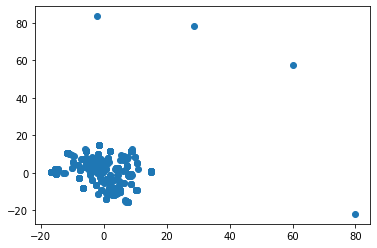

In [27]:
# Prepare to plot the dataset
# The first column of transformed features
X = tsne_features[:,0]

# The second column of transformed features
y = tsne_features[:,1]

# Visualize the clusters
plt.scatter(X, y)
plt.show()

## Cluster Analysis with k-Means

In [28]:
# Create an elbow plot to identify the best number of clusters. Use a 
# for-loop to determine the inertia for each `k` between 1 through 10. 
# Determine, if possible, where the elbow of the plot is, and at which 
# value of `k` it appears.

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(traded_scaled)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,52136.000000
1,2,51066.744031
2,3,50002.391178
3,4,48933.131521
4,5,48197.176254


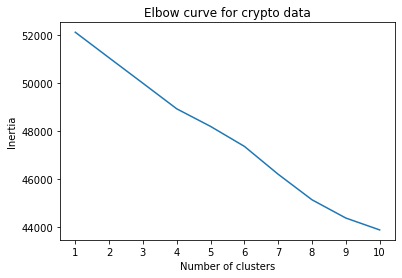

In [29]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for crypto data')
plt.show()

## Conclusions 


Based on the above, it appears that there are no meaningful clusters in the dataset. This is based off charting the data for both K-means and t-SNE.